In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import os
from tqdm import tqdm
import imageio
import cv2
from itertools import product
import shutil
# import multiprocess as mp

sys.path.append("./utils")
from myUtils import mkdir
from caUtils import plot_simulation, load_data
from Model import Model

### Script parameters
runCASimulations = True # Whether to run the CA simulations to generate the data analysed in this script
jarFileName = "./HAL_fds.jar"
# nProcesses = 4 # Number of cores to use for multi-processing
# palette_sensitiveResistant = {"S":"#0F4C13", "R":"#710303"} # Red/green scheme
palette_sensitiveResistant = {"S":"#5E7FDD", "R":"#D0D645", "TumourSize":"black"}
modelConfigDic = {'xDim':100,"yDim":100,'nTSteps':500,"saveModelState":True,"dieProb":0.01,
                  "localFreq":0,"imageFrequency":10,
                  "nReplicates":2}

dataDir = "./data/cellCountGlobalFreq"
imgDir = "./data/imagesGlobalFreq"
seedToShowImagesFor = 1
# treatmentScheduleList = [[0,10,0], [10,50,1]]

### Script parameters
runCASimulations = True # Whether to run the CA simulations to generate the data analysed in this script
# jarFileName = "./code.jar"
# nProcesses = 4 # Number of cores to use for multi-processing
palette_sensitiveResistant = {"S":"#5E7FDD", "R":"#D0D645", "TumourSize":"black"}

myModel = Model(jarFileName = jarFileName, outDir=dataDir, imageOutDir=imgDir, **modelConfigDic)
myModel.Simulate()

./data/imagesGlobalFreq/
./data/imagesGlobalFreq/


Text(0.5, 1.0, 'Global frequency dependence')

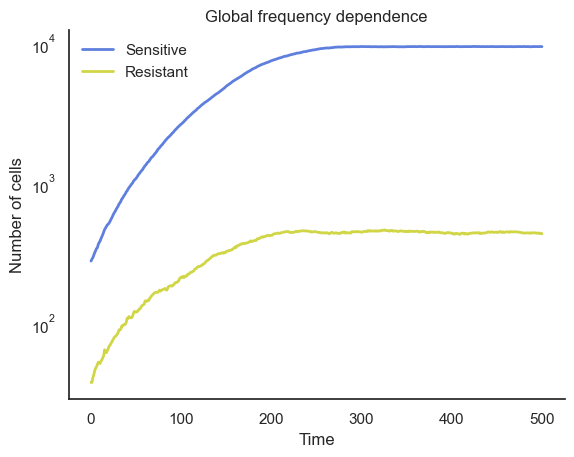

In [2]:
# load data

data_files = os.listdir(dataDir)
data_list = []

for file in data_files:
    if file.endswith(".csv"):
        data_list.append(pd.read_csv(os.path.join(dataDir, file)))

data_list.sort()

# plot data
time_vect = data_list[0]['Time']

fig,ax = plt.subplots()

for data in data_list:
    ax.plot(time_vect, data['NCells_S'], color=palette_sensitiveResistant['S'],linewidth=2)
    ax.plot(time_vect, data['NCells_R'], color=palette_sensitiveResistant['R'],linewidth=2)

ax.set_xlabel('Time')
ax.set_ylabel('Number of cells')
ax.set_yscale('log')
ax.legend(['Sensitive', 'Resistant'],frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Global frequency dependence')

In [3]:
# simulate local frequency dependence
modelConfigDic = {'xDim':100,"yDim":100,'nTSteps':500,"saveModelState":True,"dieProb":0.01,
                  "localFreq":1,"imageFrequency":10}

dataDir = "./data/cellCountLocalFreq"
imgDir = "./data/imagesLocalFreq"

myModel = Model(jarFileName = jarFileName, outDir=dataDir, imageOutDir=imgDir, **modelConfigDic)
myModel.Simulate()

Text(0.5, 1.0, 'Local frequency dependence')

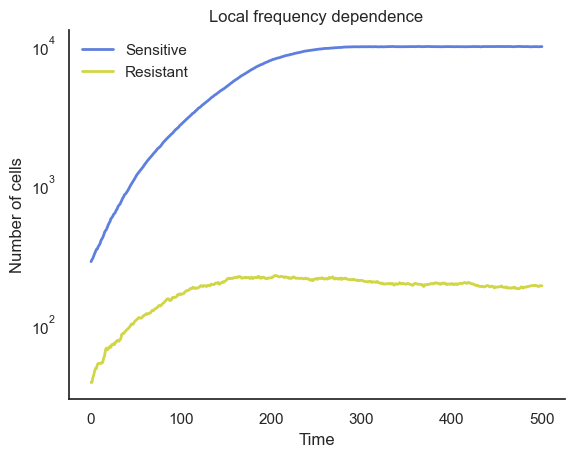

In [4]:
# load data

data_files = os.listdir(dataDir)
data_list = []

for file in data_files:
    if file.endswith(".csv"):
        data_list.append(pd.read_csv(os.path.join(dataDir, file)))

data_list.sort()

# plot data
time_vect = data_list[0]['Time']

fig,ax = plt.subplots()

for data in data_list:
    ax.plot(time_vect, data['NCells_S'], color=palette_sensitiveResistant['S'],linewidth=2)
    ax.plot(time_vect, data['NCells_R'], color=palette_sensitiveResistant['R'],linewidth=2)

ax.set_xlabel('Time')
ax.set_ylabel('Number of cells')
ax.set_yscale('log')
ax.legend(['Sensitive', 'Resistant'],frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Local frequency dependence')